Pour une lecture améliorée, ce notebook est idéalement lu avec une extension qui gère les niveaux des titres Markdown.  
Par exemple avec l'extension 'Table of Contents' du module 'Nbextensions' de Jupyter.

# Mise en place du notebook

## Import des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress as reg_lin
from mesfonctions import scatter_plot
from mesfonctions import arrondi
from mesfonctions import display_scores
from mesfonctions import barh_plot_coefs

from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor

from graphviz import Source
from sklearn.tree import export_graphviz


In [2]:
# reload d'un élément du module mesfonctions après sa modification
import mesfonctions
from importlib import reload  
mesfonctions = reload(mesfonctions)
# from mesfonctions import xxx

## Gestion des paramètres d'affichage de Jupyter

In [3]:
# pour gérer l'affichage des dataframes pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

# pour gérer l'affichage des arrays numpy
# 230 sur ma config bureau, 160 sur ma config portable
np.set_printoptions(linewidth=160)

# affichage des objets sklearn
set_config(display='diagram')

# pour afficher les gros fichiers sur toute la largeur de l'écran
from IPython.core.display import HTML
HTML("<style>.container { width:95% }</style>")

## Fonctions en cours de développement (à déplacer ultérieurement dans un fichier .py externe)

## Chargement du pickle du df nettoyé, contenant les PropertyUseTypeGFA

In [4]:
df1 = pd.read_pickle('df1_après_nettoyage_avec_PropertyUseTypeGFA.pkl')

# Suppression des lignes pour lesquelles la variable 'TotalGHGEmissions' n'est pas renseignée
df1 = df1.dropna(subset=['TotalGHGEmissions']).copy()

##### Liste qui contient les colonnes GFA créées:

In [5]:
# Création d'une liste contenant le nom des modalités des PropertyUseType
liste_modalites_types_1_2_3 = list(df1['LargestPropertyUseType'].dropna().unique()) + list(
    df1['SecondLargestPropertyUseType'].dropna().unique()) + list(
        df1['ThirdLargestPropertyUseType'].dropna().unique())
liste_modalites_types_1_2_3 = sorted(list(set(liste_modalites_types_1_2_3)))   # suppression doublons
liste_modalites_types_1_2_3

['Adult Education',
 'Automobile Dealership',
 'Bank Branch',
 'Bar/Nightclub',
 'College/University',
 'Convenience Store without Gas Station',
 'Convention Center',
 'Courthouse',
 'Data Center',
 'Distribution Center',
 'Enclosed Mall',
 'Fast Food Restaurant',
 'Financial Office',
 'Fire Station',
 'Fitness Center/Health Club/Gym',
 'Food Sales',
 'Food Service',
 'Hospital (General Medical & Surgical)',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Library',
 'Lifestyle Center',
 'Manufacturing/Industrial Plant',
 'Medical Office',
 'Movie Theater',
 'Multifamily Housing',
 'Museum',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Other - Education',
 'Other - Entertainment/Public Assembly',
 'Other - Lodging/Residential',
 'Other - Mall',
 'Other - Public Services',
 'Other - Recreation',
 'Other - Restaurant/Bar',
 'Other - Services',
 'Other - Technology/Science',
 'Other - Utility',
 'Other/Specialty Hospital',
 'Parking',
 'Performing Arts',
 'Personal Services (Health/Bea

In [6]:
# Création d'une liste contenant le nom des colonnes créées
liste_variables_PropertyUseTypes_GFA = []

for moda in liste_modalites_types_1_2_3:
    nom_moda_GFA = moda + ' GFA'
    liste_variables_PropertyUseTypes_GFA.append(nom_moda_GFA)

# Première approche pour TotalGHGEmissions : utilisation des surfaces des PropertyUseType

## Train test split 

POUR LE NOTEBOOK FINAL IL FAUDRA FAIRE LE SPLIT PLUS TOT (avant le nettoyage)  
IL FAUDRA FAIRE LE MEME NETTOYAGE SUR LES JEUX TRAIN ET TEST

##### Variable à prédire :

In [7]:
y2 = df1[['TotalGHGEmissions']].copy()

##### Variables explicatives :

In [8]:
X2 = df1[liste_variables_PropertyUseTypes_GFA].copy()

##### Split :

In [9]:
X_train_EU, X_test_EU, y_train_EU, y_test_EU = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [10]:
y_train_EU

,TotalGHGEmissions
325,93.23
2355,24.63
613,110.41
399,74.31
1134,18.16
...,...
1171,82.34
2095,26.52
3363,14.37
569,20.12


In [11]:
X_train_EU

,Adult Education GFA,Automobile Dealership GFA,Bank Branch GFA,Bar/Nightclub GFA,College/University GFA,Convenience Store without Gas Station GFA,Convention Center GFA,Courthouse GFA,Data Center GFA,Distribution Center GFA,Enclosed Mall GFA,Fast Food Restaurant GFA,Financial Office GFA,Fire Station GFA,Fitness Center/Health Club/Gym GFA,Food Sales GFA,Food Service GFA,Hospital (General Medical & Surgical) GFA,Hotel GFA,K-12 School GFA,Laboratory GFA,Library GFA,Lifestyle Center GFA,Manufacturing/Industrial Plant GFA,Medical Office GFA,Movie Theater GFA,Multifamily Housing GFA,Museum GFA,Non-Refrigerated Warehouse GFA,Office GFA,Other GFA,Other - Education GFA,Other - Entertainment/Public Assembly GFA,Other - Lodging/Residential GFA,Other - Mall GFA,Other - Public Services GFA,Other - Recreation GFA,Other - Restaurant/Bar GFA,Other - Services GFA,Other - Technology/Science GFA,Other - Utility GFA,Other/Specialty Hospital GFA,Parking GFA,Performing Arts GFA,"Personal Services (Health/Beauty, Dry Cleaning, etc) GFA",Police Station GFA,Pre-school/Daycare GFA,Prison/Incarceration GFA,Refrigerated Warehouse GFA,"Repair Services (Vehicle, Shoe, Locksmith, etc) GFA",Residence Hall/Dormitory GFA,Residential Care Facility GFA,Restaurant GFA,Retail Store GFA,Self-Storage Facility GFA,Senior Care Community GFA,Social/Meeting Hall GFA,Strip Mall GFA,Supermarket/Grocery Store GFA,Swimming Pool GFA,Urgent Care/Clinic/Other Outpatient GFA,Vocational School GFA,Wholesale Club/Supercenter GFA,Worship Facility GFA
325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
613,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2950,85572,0,0,0,0,0,0,0,0,0,0
399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11520,45340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6644,7245,6344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57200
2095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18000,0,0,0,0,0,0,0,0,0,0,18000,0,0,0,0,0,0,0,0,0,0
3363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7044,0,0,0,0,0,0,0,0,0,0,0


## Imputation, one-hot encoding, recalibrage

Imputation : non pertinent.  
One-hot encoding : non pertinent car toutes les variables sont quantitatives.  
Recalibrage : non pertinent, on part sur l'hypothèse que l'EnergyUse est proportionnel à la surface.  

## Dummy Regressor

In [12]:
moyenne = y_train_EU.mean()
arrondi(moyenne)

176

In [13]:
ecart_type = y_train_EU.std()
arrondi(ecart_type)

627

In [14]:
zipped = zip(["mean", "median", "quantile", "constant"], [None, None, 0.8, None], [None, None, None, moyenne])
for strategy, quantile, constant in zipped:
    print("Stratégie :", strategy, "/", quantile, constant)
    dum_reg = DummyRegressor(strategy=strategy, quantile=quantile, constant=constant)
    dum_reg.fit(X_train_EU, y_train_EU)
    EU_predictions = dum_reg.predict(X_train_EU)
    print("R² =", arrondi(r2_score(y_train_EU, EU_predictions)))
    print()

Stratégie : mean / None None
R² = 0

Stratégie : median / None None
R² = -0.041

Stratégie : quantile / 0.8 None
R² = -0.000203

Stratégie : constant / None TotalGHGEmissions    176.428146
dtype: float64
R² = 0



##### Prédiction sur y_test

In [15]:
dum_reg = DummyRegressor(strategy='mean')
dum_reg.fit(X_train_EU, y_train_EU)
print(arrondi(dum_reg.score(X_test_EU, y_test_EU), 5))

-0.0014509


##### Cross validation

In [16]:
dum_reg = DummyRegressor(strategy='mean')
dum_scores = cross_val_score(dum_reg, X_train_EU, y_train_EU,
                             scoring="r2", cv=10)
display_scores(dum_scores, 2)

Scores: -0.0027 -0.076 -0.0042 -0.019 -0.00071 -0.00087 -0.016 -0.0011 -0.0013 -0.004 
Mean: -0.013
Standard deviation: 0.023


## Régression linéaire simple

In [17]:
lin_reg = LinearRegression()

# Entrainement
lin_reg.fit(X_train_EU, y_train_EU)

LinearRegression()

In [18]:
# Test de quelques valeurs prédites
some_data = X_train_EU.iloc[:100]
some_labels = y_train_EU.iloc[:100].copy()
some_data_predicted = lin_reg.predict(some_data)

some_labels['Prédictions'] = some_data_predicted
some_labels.sample(10)

,TotalGHGEmissions,Prédictions
2382,226.81,282.727832
49,2451.58,2710.403008
3166,265.21,125.283639
3009,0.87,28.163802
3364,24.73,61.710967
3218,20.10,36.828866
3279,48.53,117.497305
2996,338.58,210.613900
2644,87.41,80.959585
1208,180.38,93.147343


### Metrics

##### RMSE :

In [19]:
EU_predictions = lin_reg.predict(X_train_EU)
lin_mse = mean_squared_error(y_train_EU, EU_predictions)
lin_rmse = np.sqrt(lin_mse)
arrondi(lin_rmse)

190

##### MAE :

In [20]:
lin_mae = mean_absolute_error(y_train_EU, EU_predictions)
arrondi(lin_mae)

85.3

##### R² :

In [21]:
arrondi(lin_reg.score(X_train_EU, y_train_EU))

0.908

### Cross validation

In [22]:
lin_scores = cross_val_score(lin_reg, X_train_EU, y_train_EU,
                             scoring="neg_root_mean_squared_error", cv=10)
display_scores(-lin_scores)

Scores: 9900000000000 194 210 199 303 260 265 317 264 241 
Mean: 990000000000
Standard deviation: 3130000000000


In [23]:
lin_scores = cross_val_score(lin_reg, X_train_EU, y_train_EU,
                             scoring="r2", cv=10)
display_scores(lin_scores)

Scores: -6.01e+20 0.133 0.864 0.519 0.292 0.565 0.521 0.886 0.939 0.93 
Mean: -6.01e+19
Standard deviation: 190000000000000000000


### Généralisation du modèle sur y_test

In [24]:
EU_predictions = lin_reg.predict(X_test_EU)
#R² par la fonction r2_score de metrics
print(arrondi(r2_score(y_test_EU, EU_predictions)))

0.506


##### Scatter plot

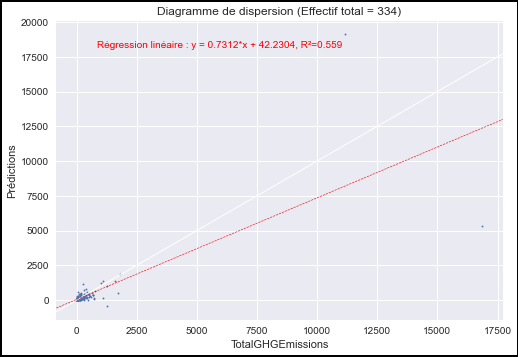

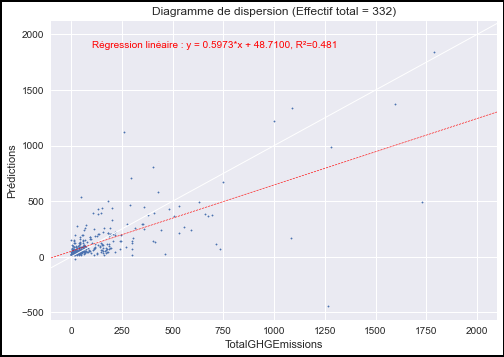

In [25]:
ser_predictions = pd.Series(np.squeeze(EU_predictions), name='Prédictions')
scatter_plot(ser_x=y_test_EU.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, ligne_diagonale=True)
scatter_plot(ser_x=y_test_EU.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, max_x=2000, max_y=2000, ligne_diagonale=True)

### Analyse des paramètres du modèle

In [26]:
arrondi(lin_reg.intercept_)

18.2

In [27]:
print("lin_reg.coef_ shape :", lin_reg.coef_.shape)
coefs = lin_reg.coef_

lin_reg.coef_ shape : (1, 64)


In [28]:
coefs

array([[ 1.38167582e-03,  1.81860247e-04,  1.15894306e-03,  1.06399567e-02,  2.04846950e-03, -2.79540161e-02, -3.89748997e-15, -8.62684559e-04,
         7.37865902e-03,  7.61637136e-04, -3.00937016e-04, -4.16843105e-02, -6.23605834e-05,  1.74281154e-03,  4.30078411e-03,  7.51201307e-03,
         3.72391953e-03,  7.54514333e-03,  2.68507179e-03,  8.95074379e-04,  7.55343346e-03,  4.85401912e-04,  2.37615947e-03,  7.00500948e-04,
         2.44112157e-03, -1.11563443e-03, -6.01103507e-04,  2.02454003e-03,  4.34337702e-04,  3.97280942e-04,  3.42987470e-03,  8.19839909e-05,
         7.81221678e-04,  1.02865783e-03, -6.61968366e-04,  5.67060980e-04,  1.51789488e-03,  1.04375737e-02,  2.36523759e-03,  4.55988243e-02,
         1.61078623e-04,  1.17056077e-02,  1.93049496e-04,  2.50006123e-03,  1.48916447e-03, -7.49331932e-17,  3.98650460e-04,  5.62952228e-05,
         2.26725996e-04,  1.91603096e-03,  1.11129233e-03, -8.82991541e-05,  7.76506135e-03,  2.89125773e-04,  2.53547778e-05,  1.611351

In [29]:
liste_effectif = []
for moda in liste_modalites_types_1_2_3:
    effectif = len(df1[moda+' GFA'][df1[moda+' GFA']!=0])
    liste_effectif.append(effectif)
df_coefs = pd.DataFrame(liste_effectif, columns=['Effectif'], index=liste_modalites_types_1_2_3)

In [30]:
df_coefs['Coef NR LR'] = coefs.T
with pd.option_context('display.max_rows', 300, 'display.max_colwidth', None, 'display.max_columns', 100, 'display.precision', 1) :
    display(df_coefs.sort_values(by='Coef NR LR', ascending=False))

,Effectif,Coef NR LR
Other - Technology/Science,2,4.6e-02
Other/Specialty Hospital,5,1.2e-02
Bar/Nightclub,4,1.1e-02
Other - Restaurant/Bar,9,1.0e-02
Social/Meeting Hall,19,9.5e-03
Urgent Care/Clinic/Other Outpatient,4,7.8e-03
Restaurant,73,7.8e-03
Laboratory,23,7.6e-03
Hospital (General Medical & Surgical),11,7.5e-03
Food Sales,2,7.5e-03


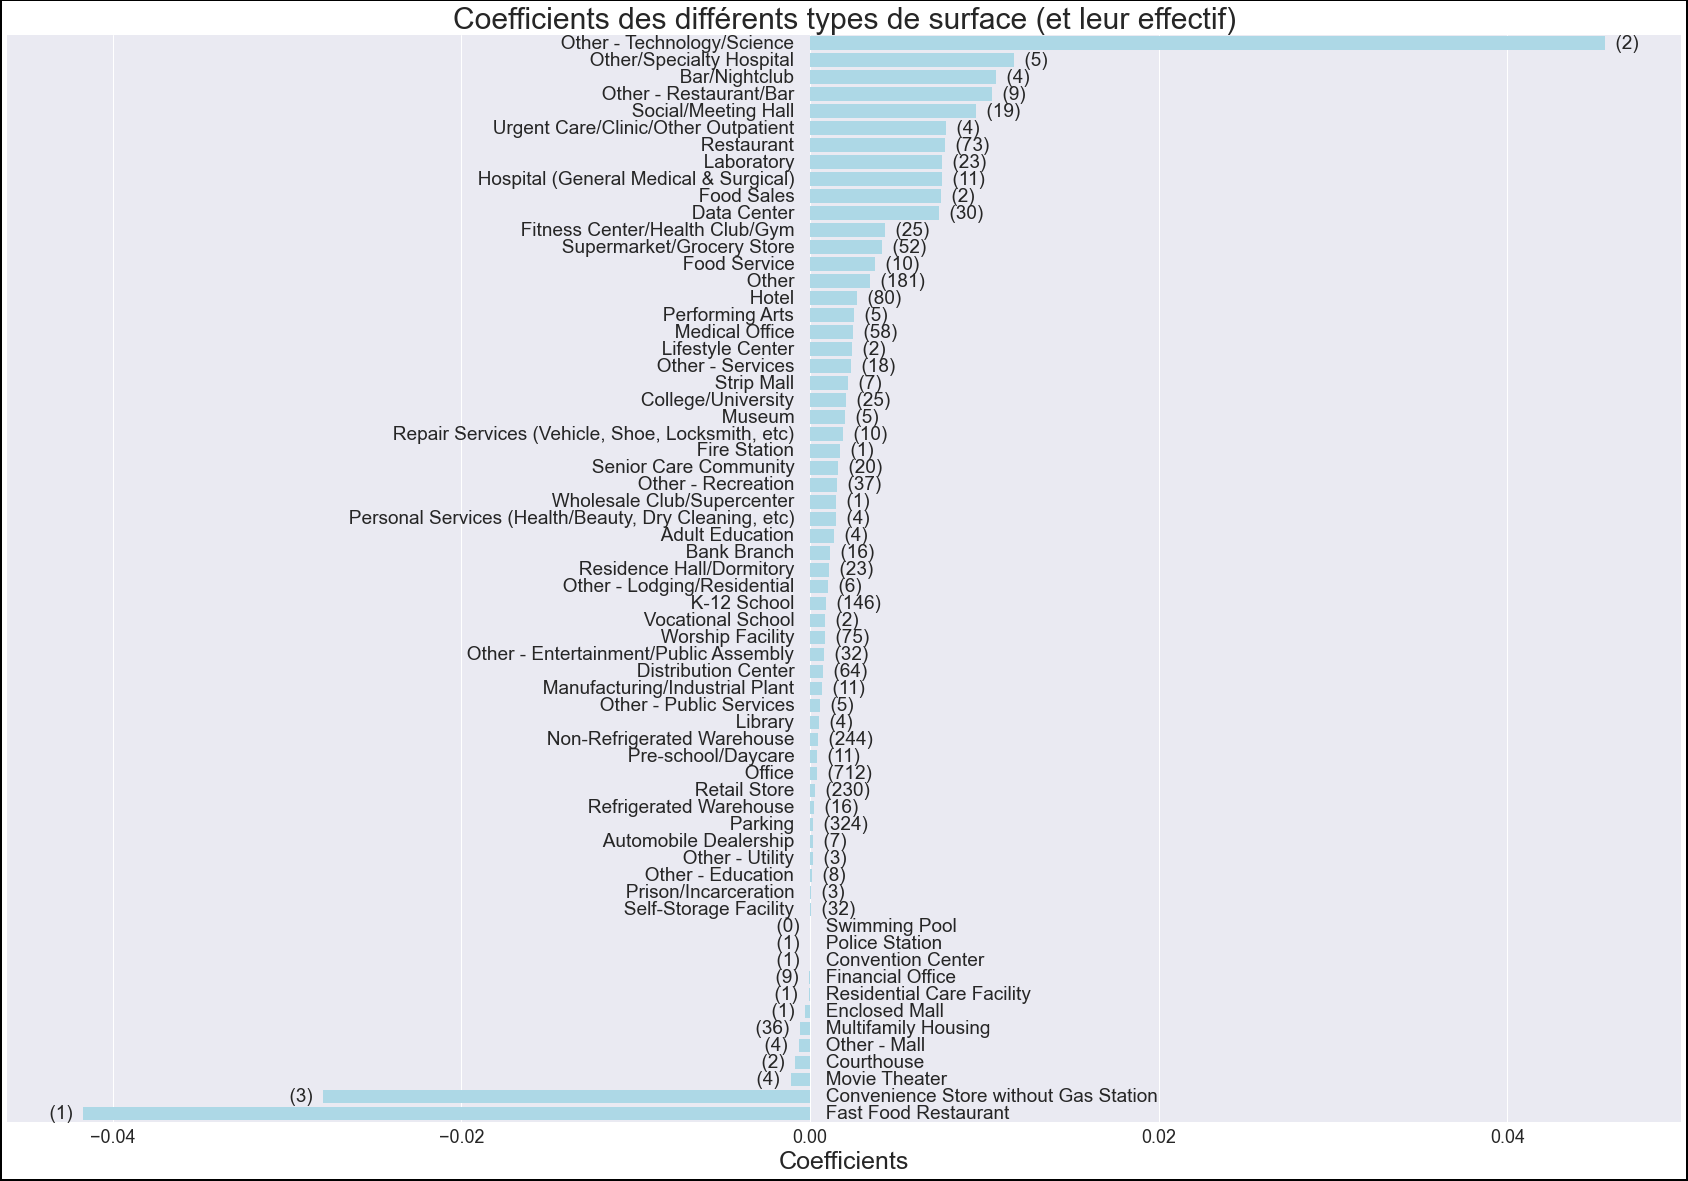

In [31]:
barh_plot_coefs(x_array = df_coefs.sort_values(by='Coef NR LR', ascending=True).iloc[:, 1], effectif_array=df_coefs.sort_values(by='Coef NR LR', ascending=True).iloc[:, 0])

## Recalibrage des variables

### Transformation = StandardScaler

In [32]:
ss = StandardScaler()
X_train_EU_ss = ss.fit_transform(X_train_EU)
X_test_EU_ss = ss.transform(X_test_EU)

##### Régression linéaire simple :

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_EU_ss, y_train_EU)
EU_predictions = lin_reg.predict(X_train_EU_ss)

print("R² =", arrondi(r2_score(y_train_EU, EU_predictions)))

R² = 0.908


Comme attendu, on retrouve le même R² que pour la régression linéaire simple sans scaler, car le scaler fait une transformation linéaire.

In [34]:
arrondi(lin_reg.intercept_)

176

In [35]:
lin_reg.coef_

array([[ 2.35014818e+00,  7.51564303e-01,  1.47688575e+00,  4.53237490e+00,  1.12051852e+02, -2.52331843e+00, -7.10542736e-14, -1.84217262e+00,
         5.03089852e+01,  9.94728910e+00, -2.56916391e-01, -1.24980597e+00, -2.40648090e-01,  1.86680064e+00,  1.39638473e+01,  2.06213273e+00,
         3.25389903e+00,  5.47633132e+02,  1.34364397e+02,  2.49090920e+01,  7.87355552e+01,  3.38009882e-01,  2.14268228e+01,  3.05135142e+00,
         6.16806301e+01, -2.93743341e+00, -6.53181875e+00,  4.02358993e+00,  1.23370961e+01,  4.67483429e+01,  1.09940261e+02,  9.07393547e-02,
         4.32654134e+01,  1.81815127e+00, -1.02449063e+01,  3.05944225e-01,  2.46947505e+01,  1.30879445e+01,  8.77120607e+00,  1.40092254e+01,
         6.31781053e-01,  3.36852417e+01,  9.43344190e+00,  4.99984012e+00,  1.13521203e+00, -2.11771740e+14,  6.44092142e-01,  1.50677476e-02,
         1.91791853e+00,  4.24657112e+00,  1.16104146e+01, -7.80398314e-02,  3.16839365e+01,  8.65141754e+00,  1.88498161e-01,  3.617843

In [36]:
df_coefs['Coef SS LR'] = lin_reg.coef_.T

In [37]:
with pd.option_context('display.max_rows', 300, 'display.max_colwidth', None, 'display.max_columns', 100, 'display.precision', 1) :
    display(df_coefs.sort_values(by='Coef SS LR', ascending=False))

,Effectif,Coef NR LR,Coef SS LR
Swimming Pool,0,-8.7e-18,1.0e+04
Hospital (General Medical & Surgical),11,7.5e-03,5.5e+02
Hotel,80,2.7e-03,1.3e+02
College/University,25,2.0e-03,1.1e+02
Other,181,3.4e-03,1.1e+02
Laboratory,23,7.6e-03,7.9e+01
Medical Office,58,2.4e-03,6.2e+01
Data Center,30,7.4e-03,5.0e+01
Office,712,4.0e-04,4.7e+01
Other - Entertainment/Public Assembly,32,7.8e-04,4.3e+01


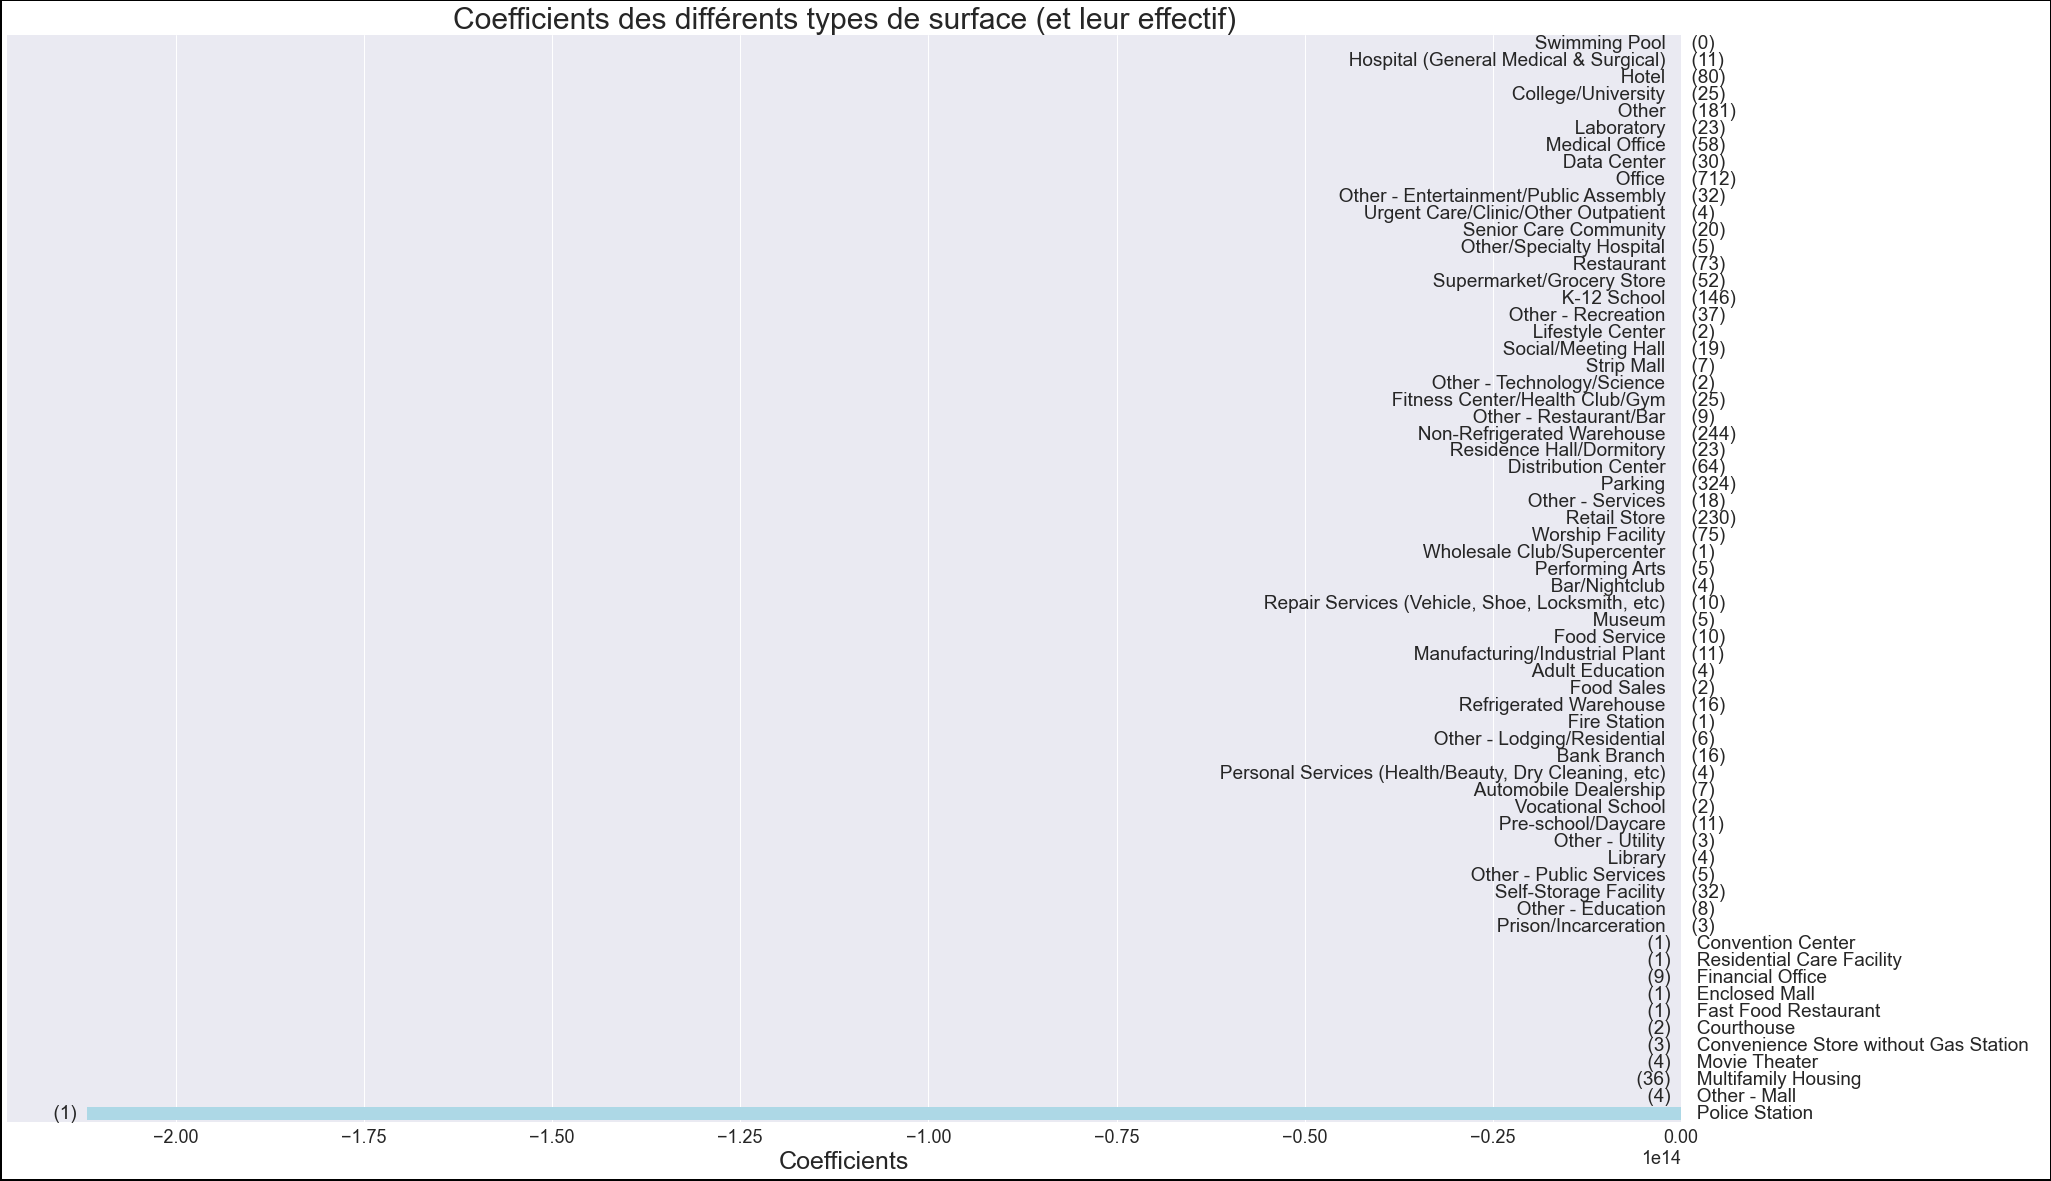

In [38]:
barh_plot_coefs(x_array = df_coefs.sort_values(by='Coef SS LR', ascending=True).loc[:, 'Coef SS LR'], effectif_array=df_coefs.sort_values(by='Coef SS LR', ascending=True).iloc[:, 0])

Les coefs "piscine" et "police station" sont aberrants => nécessité de régulariser.

##### Cross validation

In [39]:
lin_scores = cross_val_score(lin_reg, X_train_EU_ss, y_train_EU,
                             scoring="r2", cv=10)
display_scores(lin_scores)

Scores: -2.96e+22 -3.15e+24 -12100.0 0.533 0.288 -1.88e+25 -4.16e+23 0.887 0.939 -5.32 
Mean: -2.23e+24
Standard deviation: 5889999999999999509266432


Théoriquement, pour ces résultats de cross-validation (RMSE et R²), on devrait retrouver les mêmes résultats que pour la cross-validation sur le jeu de données non recalibré. Il y a vraisemblablement un bug !  A priori le pb vient de coefs non nuls sur des variables avec 0 donnée. Les bugs disparaissent avec le Lasso.

## Ridge regression

### Variables non recalibrées

In [40]:
ridge_nr = RidgeCV(alphas=np.logspace(8, 12, 100), cv=10)   
ridge_nr.fit(X_train_EU, y_train_EU)

RidgeCV(alphas=array([1.00000000e+08, 1.09749877e+08, 1.20450354e+08, 1.32194115e+08, 1.45082878e+08, 1.59228279e+08, 1.74752840e+08, 1.91791026e+08, 2.10490414e+08,
       2.31012970e+08, 2.53536449e+08, 2.78255940e+08, 3.05385551e+08, 3.35160265e+08, 3.67837977e+08, 4.03701726e+08, 4.43062146e+08, 4.86260158e+08,
       5.33669923e+08, 5.85702082e+08, 6.42807312e+08, 7.05480231e+0...
       8.11130831e+10, 8.90215085e+10, 9.77009957e+10, 1.07226722e+11, 1.17681195e+11, 1.29154967e+11, 1.41747416e+11, 1.55567614e+11, 1.70735265e+11,
       1.87381742e+11, 2.05651231e+11, 2.25701972e+11, 2.47707636e+11, 2.71858824e+11, 2.98364724e+11, 3.27454916e+11, 3.59381366e+11, 3.94420606e+11,
       4.32876128e+11, 4.75081016e+11, 5.21400829e+11, 5.72236766e+11, 6.28029144e+11, 6.89261210e+11, 7.56463328e+11, 8.30217568e+11, 9.11162756e+11,
       1.00000000e+12]),
        cv=10)

In [41]:
best_alpha = ridge_nr.alpha_
arrondi(best_alpha, puissance10=9)

'4.13e9'

In [42]:
# R²
arrondi(ridge_nr.best_score_)

0.678

In [43]:
Très bien : on passe de 

SyntaxError: invalid syntax (<ipython-input-43-7d387b6f1794>, line 1)

In [ ]:
arrondi(float(ridge_nr.intercept_))

In [ ]:
print(ridge_nr.coef_.shape)
ridge_nr.coef_

##### Prédiction sur y_test

In [ ]:
ridge_nr = Ridge(alpha=best_alpha)
ridge_nr.fit(X_train_EU, y_train_EU)
R2_nr_ridge_cv = arrondi(ridge_nr.score(X_test_EU, y_test_EU))
print(R2_nr_ridge_cv)

La généralisation sur X_train se passe mal.

### Recalibrage par StandardScaler

#### RidgeCV classique (cv=10)

In [ ]:
ridge_ss = RidgeCV(alphas=np.logspace(0, 2, 100), cv=10)    # 100 valeurs alpha entre 1e0 et 1e2
ridge_ss.fit(X_train_EU_ss, y_train_EU)

In [ ]:
best_alpha = ridge_ss.alpha_
best_alpha

In [ ]:
# R²
arrondi(ridge_ss.best_score_)

In [ ]:
arrondi(float(ridge_ss.intercept_))

In [ ]:
print(ridge_ss.coef_.shape)
ridge_ss.coef_

In [ ]:
df_coefs['Coef SS Ridge'] = ridge_ss.coef_.T

In [ ]:
with pd.option_context('display.max_rows', 300, 'display.max_colwidth', None, 'display.max_columns', 100, 'display.precision', 1) :
    display(df_coefs.sort_values(by='Coef SS Ridge', ascending=False))

In [ ]:
barh_plot_coefs(x_array = df_coefs.sort_values(by='Coef SS Ridge', ascending=True).loc[:, 'Coef SS Ridge'], effectif_array=df_coefs.sort_values(by='Coef SS Ridge', ascending=True).iloc[:, 0])

##### Prédiction sur y_test

In [ ]:
ridge_ss = Ridge(alpha=best_alpha)
ridge_ss.fit(X_train_EU_ss, y_train_EU)
R2_ss_ridge_cv = arrondi(ridge_ss.score(X_test_EU_ss, y_test_EU))
print(R2_ss_ridge_cv)

La généralisation sur X_train se passe mal.

#### RidgeCV LOO (cv=None (use the Leave-One-Out cross-validation))

In [ ]:
ridge_ss_LOO = RidgeCV(alphas=np.logspace(0, 2, 100), cv=None)
ridge_ss_LOO.fit(X_train_EU_ss, y_train_EU);

In [ ]:
ridge_ss_LOO.alpha_

In [ ]:
# root mean squared error 
R2_ss_ridge_cv_LOO = arrondi(-ridge_ss_LOO.best_score_, 5)   # lorsque cv=None, best_score_ retourne negMSE
print("RMSE =", arrondi(np.sqrt(R2_ss_ridge_cv_LOO)))

C'est mauvais en apparence (RMSE =190 pour modèle linéaire CV), mais je n'ai pas de LOO pour comparer toutes choses égales par ailleurs.

##### Prédiction sur y_test

In [ ]:
ridge_ss_LOO = Ridge(alpha=best_alpha)
ridge_ss_LOO.fit(X_train_EU_ss, y_train_EU)
print(arrondi(ridge_ss_LOO.score(X_test_EU_ss, y_test_EU), 5))

#### Faire une validation croisée "à la main" pour mieux maitriser le fonctionnement interne d'une fonction "tout-en-un" comme RidgeCV :

In [ ]:
ridge_ss_test = Ridge(alpha=best_alpha) 
scores = cross_val_score(ridge_ss_test, X_train_EU_ss, y_train_EU, 
                         scoring="r2", cv=10)
display_scores(scores)

L'écart-type plutôt élevé est préoccupant ; il traduit un problème lié aux folds.  

#### Plot du R² en fonction du nb de folds

In [ ]:
liste_cv = []
liste_mean = []
liste_std = []
for i in range(2, 35):
    ridge_ss_test = Ridge(alpha=best_alpha) 
    scores = cross_val_score(ridge_ss_test, X_train_EU_ss, y_train_EU, 
                             scoring="r2", cv=i)
    liste_cv.append(i)
    liste_mean.append(scores.mean())
    liste_std.append(scores.std(ddof=1))

In [ ]:
plt.plot(liste_cv, liste_mean)
plt.plot(liste_cv, liste_std)
plt.xlabel('nombre de folds')
plt.legend(['R² (moyenne sur k folds)', 'écart-type des R²']);

La taille du dataset est trop petite pour envisager un nombre de folds trop important.  

#### Plot du R² en fonction de alpha

In [ ]:
# calcul de la baseline_R2
lin_scores = cross_val_score(lin_reg, X_train_EU, y_train_EU,
                             scoring="r2", cv=10)
baseline_R2 = lin_scores.mean()
arrondi(baseline_R2)

=>  impossible d'avoir une baseline

In [ ]:
baseline_R2 = 0

In [ ]:
# calcul des R² pour chaque alpha
liste_alpha = np.logspace(-2, 7, 100)   # 100 valeurs alpha entre 1e-1 et 1e2
liste_R2 = []
liste_baseline = []
for alpha in liste_alpha:  
    ridge_ss_test = Ridge(alpha=alpha) 
    scores = cross_val_score(ridge_ss_test, X_train_EU_ss, y_train_EU, 
                             scoring="r2", cv=10)
    liste_R2.append(scores.mean())
    liste_baseline.append(baseline_R2)

In [ ]:
plt.style.use('seaborn')
plt.figure(edgecolor='black', linewidth=4)
plt.plot(liste_alpha, liste_R2)
plt.plot(liste_alpha, liste_baseline, linestyle=':')
plt.xlabel('alpha')
plt.xscale("log")
plt.legend(['R² (modèle régularisé '+'$\ell_2$'+')', 'R² (sans régularisation)'])
plt.show()

Le gain obtenu pour le modèle régularisé par rapport au modèle linéaire simple est très faible.  
L'optimum se retrouve bien vers alpha = 41.  

### Conclusion sur les régressions ridge

Le gain de R² obtenu par l'ajout d'un régularisateur ridge est faible :  
- R² = {{R2_nr_ridge_cv}} sans recalibrage.  
- R² = {{R2_ss_ridge_cv}} si recalibrage StandardScaler.

## Régression LASSO (variables recalibrées par StandardScaler)

### Fonction LassoCV

In [ ]:
lasso_ss = LassoCV(alphas=np.logspace(-3, 10, 100), cv=10, tol=1e-10) 
lasso_ss.fit(X_train_EU_ss, y_train_EU.iloc[:,0])

In [ ]:
lasso_ss.alpha_

In [ ]:
lasso_ss.n_iter_

In [ ]:
arrondi(lasso_ss.intercept_)

Malgré le paramètre tol très faible, je ne parviens pas à avoir un calcul de LassoCV qui termine sur les valeurs obtenues avec la fonction Lasso.

### Plot du R² en fonction de alpha (fonction Lasso)

In [ ]:
# calcul des R² pour chaque alpha
liste_alpha = np.logspace(-3, 4, 300)   # 300 valeurs alpha
liste_R2 = []
liste_baseline = []
for alpha in liste_alpha:  
    lasso_ss = Lasso(alpha=alpha) 
    scores = cross_val_score(lasso_ss, X_train_EU_ss, y_train_EU, 
                             scoring="r2", cv=10)
    liste_R2.append(scores.mean())
    liste_baseline.append(baseline_R2)

In [ ]:
plt.style.use('seaborn')
plt.figure(edgecolor='black', linewidth=4)
plt.plot(liste_alpha, liste_R2)
plt.plot(liste_alpha, liste_baseline, linestyle=':')
plt.xlabel('alpha')
plt.xscale("log")
plt.legend(['R² (modèle régularisé '+'$\ell_1$'+')', 'R² (sans régularisation)']);

In [ ]:
indice_du_maxi = liste_R2.index(max(liste_R2))
print("Valeur optimale de alpha =", liste_alpha[indice_du_maxi])
print("Valeur optimale de R² =", arrondi(liste_R2[indice_du_maxi]))

In [ ]:
lasso_optimum = Lasso(alpha=liste_alpha[indice_du_maxi]) 
lasso_optimum.fit(X_train_EU_ss, y_train_EU)

In [ ]:
arrondi(float(lasso_optimum.intercept_))

In [ ]:
lasso_optimum.coef_

Le lasso met un grand nombre de coefficients à 0.

In [ ]:
df_coefs['Coef SS Lasso'] = lasso_optimum.coef_.T

In [ ]:
with pd.option_context('display.max_rows', 300, 'display.max_colwidth', None, 'display.max_columns', 100, 'display.precision', 1) :
    display(df_coefs.sort_values(by='Coef SS Lasso', ascending=False))

In [ ]:
barh_plot_coefs(x_array = df_coefs.sort_values(by='Coef SS Lasso', ascending=True).loc[:, 'Coef SS Lasso'], effectif_array=df_coefs.sort_values(by='Coef SS Lasso', ascending=True).iloc[:, 0])

Le gain de R² obtenu par l'ajout d'un régularisateur ridge est faible.  
Toutes choses égales par ailleurs (scaling SS, CV=10 dans les modèles), les R² sont :
- non calculable (sans régularisation),  
- 0.693 (Ridge),
- 0.698 (Lasso).

##### Prédiction sur y_test

In [ ]:
lasso_optimum.fit(X_train_EU_ss, y_train_EU)
print(arrondi(lasso_optimum.score(X_test_EU_ss, y_test_EU)))

In [ ]:
EU_predictions = lasso_optimum.predict(X_test_EU_ss)
ser_predictions = pd.Series(np.squeeze(EU_predictions), name='Prédictions')
scatter_plot(ser_x=y_test_EU.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, ligne_diagonale=True)
scatter_plot(ser_x=y_test_EU.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, max_x=2000, max_y=2000, ligne_diagonale=True)

## Arbres de décision (DecisionTreeRegressor)

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train_EU, y_train_EU)

In [ ]:
df_feature_importances = pd.Series(tree_reg.feature_importances_, index=liste_modalites_types_1_2_3)
df_feature_importances.sort_values(ascending=False).head(100)

##### RMSE / validation croisée

In [ ]:
scores = cross_val_score(tree_reg, X_train_EU, y_train_EU, 
                         scoring="neg_root_mean_squared_error", cv=10)
display_scores(-scores)

##### R² / validation croisée

In [ ]:
scores = cross_val_score(tree_reg, X_train_EU, y_train_EU, 
                         scoring="r2", cv=10)
display_scores(scores)

##### Dessin de l'arbre

In [ ]:
export_graphviz(
        tree_reg,
        out_file="tree_reg.dot",
        feature_names=liste_modalites_types_1_2_3,
        class_names="SiteEnergyUse(kBtu)",
        rounded=True,
        filled=True
    )

In [ ]:
Source.from_file("tree_reg.dot")

In [ ]:
tree_reg.get_n_leaves()

In [ ]:
tree_reg.get_depth()

### Régularisation

In [ ]:
param_grid = [{'max_depth': [2, 4, 8, 16, 32, 64, 128, 256]}, {'min_samples_leaf': [2**x for x in range(12)]}]
grid_search = GridSearchCV(tree_reg, param_grid, cv=10,
                           scoring='r2', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_EU, y_train_EU.iloc[:,0])

In [ ]:
grid_search.best_params_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

Le meilleur R² est encourageant.

##### Généralisation sur le test set

In [ ]:
EU_predictions = grid_search.predict(X_test_EU)
print("R² =", arrondi(r2_score(y_test_EU, EU_predictions)))

De manière surprenante, le R² du test set mauvais.

## Forêts aléatoires

In [ ]:
forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(X_train_EU, y_train_EU.iloc[:,0])

In [ ]:
forest_scores = cross_val_score(forest_reg, X_train_EU, y_train_EU.iloc[:,0],
                                scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
display_scores(-forest_scores)

In [ ]:
forest_scores = cross_val_score(forest_reg, X_train_EU, y_train_EU.iloc[:,0],
                                scoring="r2", cv=10, n_jobs=-1)
display_scores(forest_scores)

##### Généralisation sur le test set

In [ ]:
EU_predictions = forest_reg.predict(X_test_EU)
print("R² =", r2_score(y_test_EU, EU_predictions))

### Régularisation

##### GridSearchCV à une dimension :

In [ ]:
param_grid = [{'max_depth': [4, 8, 16, 32, 64, 128]}, 
    {'min_samples_leaf': [2**x for x in range(9)]},
    {'max_features': [4, 8, 16, 32, 63]},
    {'n_estimators': [4, 8, 16, 32, 64, 128, 256]}]
grid_search = GridSearchCV(forest_reg,
                           param_grid,
                           cv=10,
                           scoring='r2',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train_EU, y_train_EU.iloc[:, 0])

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

##### GridSearchCV à deux dimensions :

In [ ]:
param_grid = [{'max_depth': [4, 16, 64], 'min_samples_leaf': [1, 2], 'max_features': [16, 32, 63], 'n_estimators': [16, 64, 256]}]

grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='r2', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_EU, y_train_EU.iloc[:,0])

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
cvres = grid_search.cv_results_
resultats_zip = zip(cvres["mean_test_score"], cvres["params"])
resultats_zip = list(resultats_zip)
resultats_zip.sort(reverse=True)   # tri par score
for mean_score, params in resultats_zip:
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

##### Généralisation sur le test set

In [44]:
EU_predictions = grid_search.predict(X_test_EU)
print("R² =", arrondi(r2_score(y_test_EU, EU_predictions)))

NameError: name 'grid_search' is not defined

Le score est médiocre.

## AdaBoost DecisionTreeRegressor

In [ ]:
ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=None), n_estimators=50,
    learning_rate=1.0, random_state=0)
ada_reg.fit(X_train_EU, y_train_EU.iloc[:,0])

In [ ]:
ada_scores = cross_val_score(ada_reg, X_train_EU, y_train_EU.iloc[:,0],
                                scoring="r2", cv=10, n_jobs=-1)
display_scores(ada_scores)

C'est encourageant.

### Régularisation

##### GridSearchCV à une dimension :

In [45]:
ada_reg.get_params()

NameError: name 'ada_reg' is not defined

In [ ]:
param_grid = [{'base_estimator__max_depth': [4, 8, 16, 32, 64, 128]}, 
    {'base_estimator__min_samples_leaf': [2**x for x in range(9)]},
    {'base_estimator__max_features': [4, 8, 16, 32, 63]},
    {'n_estimators': [4, 8, 16, 32, 64, 128, 256]}]
grid_search = GridSearchCV(ada_reg,
                           param_grid,
                           cv=10,
                           scoring='r2',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train_EU, y_train_EU.iloc[:, 0])

In [ ]:
grid_search.best_params_

In [46]:
arrondi(grid_search.best_score_)

NameError: name 'grid_search' is not defined

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

##### GridSearchCV à deux dimensions :

In [47]:
param_grid = [{'base_estimator__max_depth': [8, 16, 32, 64, 128], 'base_estimator__min_samples_leaf': [1, 2, 3, 4, 6, 8], 'base_estimator__max_features': [32, 48, 63], 'n_estimators': [8, 32, 64, 128]}]

grid_search = GridSearchCV(ada_reg, param_grid, cv=10,
                           scoring='r2', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_EU, y_train_EU.iloc[:,0])

NameError: name 'ada_reg' is not defined

In [ ]:
grid_search.best_params_

In [ ]:
arrondi(grid_search.best_score_)

In [ ]:
cvres = grid_search.cv_results_
liste_ordonnee = [x for x in range(len(cvres["mean_test_score"]))]    # on est obligés de rajouter une valeur pour que la méthode sort() ne plante pas en cas d'égalité de score car elle va chercher à comparer des dictionnaires (cvres["params"])
resultats_zip = zip(cvres["mean_test_score"], liste_ordonnee, cvres["params"])
resultats_zip = list(resultats_zip)
resultats_zip
resultats_zip.sort(reverse=True)   # tri par score
for mean_score, _, params in resultats_zip:
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

##### Généralisation sur le test set

In [48]:
EU_predictions = grid_search.predict(X_test_EU)
print("R² =", arrondi(r2_score(y_test_EU, EU_predictions)))

NameError: name 'grid_search' is not defined

La généralisation sur le test set est médiocre.

## Gradient boosted regression trees

Note : c'est l'équivalent sklearn de XGBoost.

In [49]:
GBT_reg = GradientBoostingRegressor(random_state=0)
GBT_reg.fit(X_train_EU, y_train_EU.iloc[:,0])

GradientBoostingRegressor(random_state=0)

In [50]:
GBT_scores = cross_val_score(GBT_reg, X_train_EU, y_train_EU.iloc[:,0],
                                scoring="r2", cv=10, n_jobs=-1)
display_scores(GBT_scores)

Scores: 0.547 0.0665 0.562 0.492 0.308 0.311 0.212 0.957 0.937 0.792 
Mean: 0.518
Standard deviation: 0.304


C'est aussi bien que le régresseur par défaut avec AdaBoost.

### Régularisation

##### GridSearchCV à une dimension :

In [51]:
GBT_reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [52]:
param_grid = [{'max_depth': [1, 2, 3, 4, 8, 16, 32, 64, 128]}, 
    {'min_samples_leaf': [2**x for x in range(9)]},
    {'max_features': [4, 8, 16, 32, 63]},
    {'n_estimators': [4, 8, 16, 32, 64, 128, 256, 512]}]
grid_search = GridSearchCV(GBT_reg,
                           param_grid,
                           cv=10,
                           scoring='r2',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train_EU, y_train_EU.iloc[:, 0])

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [1, 2, 3, 4, 8, 16, 32, 64, 128]},
                         {'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 128,
                                               256]},
                         {'max_features': [4, 8, 16, 32, 63]},
                         {'n_estimators': [4, 8, 16, 32, 64, 128, 256, 512]}],
             return_train_score=True, scoring='r2')

In [53]:
grid_search.best_params_

{'n_estimators': 256}

In [54]:
arrondi(grid_search.best_score_)

0.537

In [55]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

R² =    0.445 {'max_depth': 1}
R² =    0.518 {'max_depth': 2}
R² =    0.518 {'max_depth': 3}
R² =    0.523 {'max_depth': 4}
R² =     0.53 {'max_depth': 8}
R² =    0.513 {'max_depth': 16}
R² =    0.473 {'max_depth': 32}
R² =    0.458 {'max_depth': 64}
R² =    0.453 {'max_depth': 128}
R² =    0.518 {'min_samples_leaf': 1}
R² =    0.533 {'min_samples_leaf': 2}
R² =    0.496 {'min_samples_leaf': 4}
R² =    0.138 {'min_samples_leaf': 8}
R² =   0.0204 {'min_samples_leaf': 16}
R² =  -0.0405 {'min_samples_leaf': 32}
R² = -0.00249 {'min_samples_leaf': 64}
R² =   0.0317 {'min_samples_leaf': 128}
R² =  -0.0111 {'min_samples_leaf': 256}
R² =    0.447 {'max_features': 4}
R² =    0.486 {'max_features': 8}
R² =     0.51 {'max_features': 16}
R² =     0.49 {'max_features': 32}
R² =    0.522 {'max_features': 63}
R² =    0.209 {'n_estimators': 4}
R² =    0.298 {'n_estimators': 8}
R² =    0.383 {'n_estimators': 16}
R² =    0.443 {'n_estimators': 32}
R² =    0.498 {'n_estimators': 64}
R² =    0.524 {'n_est

##### GridSearchCV à deux dimensions :

In [56]:
param_grid = [{'min_samples_leaf': [1, 2, 3], 'max_depth': [1, 2, 3, 4, 8], 'max_features': [16, 32, 63], 'n_estimators': [128, 512]}]  # temps de calcul fortement lié à n_estimators

grid_search = GridSearchCV(GBT_reg, param_grid, cv=10,
                           scoring='r2', return_train_score=True, n_jobs=7)
grid_search.fit(X_train_EU, y_train_EU.iloc[:,0])

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=7,
             param_grid=[{'max_depth': [1, 2, 3, 4, 8],
                          'max_features': [16, 32, 63],
                          'min_samples_leaf': [1, 2, 3],
                          'n_estimators': [128, 512]}],
             return_train_score=True, scoring='r2')

In [57]:
grid_search.best_params_

{'max_depth': 2,
 'max_features': 32,
 'min_samples_leaf': 1,
 'n_estimators': 512}

In [58]:
arrondi(grid_search.best_score_)

0.551

In [59]:
cvres = grid_search.cv_results_
resultats_zip = zip(cvres["mean_test_score"], cvres["params"])
resultats_zip = list(resultats_zip)
resultats_zip.sort(reverse=True)   # tri par score
for mean_score, params in resultats_zip:
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

R² =    0.551 {'max_depth': 2, 'max_features': 32, 'min_samples_leaf': 1, 'n_estimators': 512}
R² =    0.544 {'max_depth': 2, 'max_features': 63, 'min_samples_leaf': 1, 'n_estimators': 512}
R² =    0.543 {'max_depth': 4, 'max_features': 16, 'min_samples_leaf': 2, 'n_estimators': 128}
R² =    0.543 {'max_depth': 3, 'max_features': 16, 'min_samples_leaf': 2, 'n_estimators': 128}
R² =    0.543 {'max_depth': 8, 'max_features': 63, 'min_samples_leaf': 3, 'n_estimators': 128}
R² =    0.542 {'max_depth': 2, 'max_features': 32, 'min_samples_leaf': 2, 'n_estimators': 128}
R² =    0.541 {'max_depth': 2, 'max_features': 63, 'min_samples_leaf': 2, 'n_estimators': 128}
R² =    0.539 {'max_depth': 3, 'max_features': 32, 'min_samples_leaf': 2, 'n_estimators': 128}
R² =    0.536 {'max_depth': 1, 'max_features': 63, 'min_samples_leaf': 1, 'n_estimators': 512}
R² =    0.536 {'max_depth': 3, 'max_features': 63, 'min_samples_leaf': 1, 'n_estimators': 512}
R² =    0.534 {'max_depth': 2, 'max_features': 32,

On pousse sur n_estimators :

In [60]:
param_grid = [{'min_samples_leaf': [1], 'max_depth': [2], 'max_features': [32], 'n_estimators': [512, 1024, 2048]}]  # temps de calcul fortement lié à n_estimators

grid_search = GridSearchCV(GBT_reg, param_grid, cv=10,
                           scoring='r2', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_EU, y_train_EU.iloc[:,0])

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [2], 'max_features': [32],
                          'min_samples_leaf': [1],
                          'n_estimators': [512, 1024, 2048]}],
             return_train_score=True, scoring='r2')

In [61]:
grid_search.best_params_

{'max_depth': 2,
 'max_features': 32,
 'min_samples_leaf': 1,
 'n_estimators': 512}

In [62]:
arrondi(grid_search.best_score_)

0.551

In [63]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

R² =    0.551 {'max_depth': 2, 'max_features': 32, 'min_samples_leaf': 1, 'n_estimators': 512}
R² =     0.54 {'max_depth': 2, 'max_features': 32, 'min_samples_leaf': 1, 'n_estimators': 1024}
R² =    0.527 {'max_depth': 2, 'max_features': 32, 'min_samples_leaf': 1, 'n_estimators': 2048}


##### Généralisation sur le test set

In [64]:
EU_predictions = grid_search.predict(X_test_EU)
print("R² =", arrondi(r2_score(y_test_EU, EU_predictions)))

R² = 0.287


Résumé des meilleurs scores obtenus pour les modèles basés sur des DecisionTreeRegressor après généralisation sur le test set :
- arbre de décision simple (0.24).  
- random forest (0.24).  
- AdaBoost (0.20).
- Gradient Boosted (0.29).

## Bagging de modèle linéaire

In [65]:
bag_reg = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, n_jobs=-1, random_state=0)
bag_reg.fit(X_train_EU, y_train_EU.iloc[:,0])

BaggingRegressor(base_estimator=LinearRegression(), n_jobs=-1, random_state=0)

In [66]:
bag_scores = cross_val_score(bag_reg, X_train_EU, y_train_EU.iloc[:,0],
                                scoring="r2", cv=10, n_jobs=-1)
display_scores(bag_scores)

Scores: -2.11e+17 -3.61 -1.27e+21 -1.21e+20 -3.78e+18 -1.44e+22 -3.74e+19 -6.62e+16 -7.68e+20 -886000000000000.0 
Mean: -1.66e+21
Standard deviation: 4510000000000000000000


Les paramètres par défaut utilisés ci-dessus retournent de mauvais R².

### Régularisation régression linéaire simple

##### GridSearchCV à une dimension :

In [67]:
bag_reg = BaggingRegressor(base_estimator=LinearRegression(), n_jobs=-1, random_state=0)
param_grid = [
    {'max_samples': [0.25, 0.5, 0.75, 1.0]}, 
    {'bootstrap': [True, False]},
    {'max_features': [4, 8, 16, 32, 63]},
    {'n_estimators': [4, 8, 16, 32, 64]}]
grid_search = GridSearchCV(bag_reg,
                           param_grid,
                           cv=10,
                           scoring='r2',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train_EU, y_train_EU.iloc[:, 0])

GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=LinearRegression(),
                                        n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_samples': [0.25, 0.5, 0.75, 1.0]},
                         {'bootstrap': [True, False]},
                         {'max_features': [4, 8, 16, 32, 63]},
                         {'n_estimators': [4, 8, 16, 32, 64]}],
             return_train_score=True, scoring='r2')

In [68]:
grid_search.best_params_

{'max_features': 16}

In [69]:
arrondi(grid_search.best_score_)

0.303

In [70]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

R² = -4.69e+20 {'max_samples': 0.25}
R² = -4.18e+20 {'max_samples': 0.5}
R² = -2.88e+21 {'max_samples': 0.75}
R² = -1.66e+21 {'max_samples': 1.0}
R² = -1.66e+21 {'bootstrap': True}
R² = -6.37e+16 {'bootstrap': False}
R² =   0.0812 {'max_features': 4}
R² =    0.281 {'max_features': 8}
R² =    0.303 {'max_features': 16}
R² = -2.31e+18 {'max_features': 32}
R² = -9.72e+20 {'max_features': 63}
R² = -1.15e+22 {'n_estimators': 4}
R² = -2.58e+21 {'n_estimators': 8}
R² = -6.55e+20 {'n_estimators': 16}
R² = -5.18e+19 {'n_estimators': 32}
R² = -1.6e+19 {'n_estimators': 64}


##### GridSearchCV à deux dimensions :

In [71]:
param_grid = [
    {'max_samples': [0.25, 0.5, 0.75, 1.0], 
    'bootstrap': [True, False],
    'max_features': [8, 16, 32, 63],
    'n_estimators': [2, 4, 8, 16, 32]}]

grid_search = GridSearchCV(bag_reg, param_grid, cv=10,
                           scoring='r2', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_EU, y_train_EU.iloc[:,0])

GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=LinearRegression(),
                                        n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'max_features': [8, 16, 32, 63],
                          'max_samples': [0.25, 0.5, 0.75, 1.0],
                          'n_estimators': [2, 4, 8, 16, 32]}],
             return_train_score=True, scoring='r2')

In [72]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 16, 'max_samples': 1.0, 'n_estimators': 4}

In [73]:
arrondi(grid_search.best_score_)

0.466

In [74]:
cvres = grid_search.cv_results_
resultats_zip = zip(cvres["mean_test_score"], cvres["params"])
resultats_zip = list(resultats_zip)
resultats_zip.sort(reverse=True)   # tri par score
for mean_score, params in resultats_zip:
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

R² =    0.466 {'bootstrap': False, 'max_features': 16, 'max_samples': 1.0, 'n_estimators': 4}
R² =    0.465 {'bootstrap': False, 'max_features': 16, 'max_samples': 0.25, 'n_estimators': 4}
R² =    0.464 {'bootstrap': False, 'max_features': 32, 'max_samples': 0.5, 'n_estimators': 8}
R² =    0.453 {'bootstrap': False, 'max_features': 32, 'max_samples': 0.75, 'n_estimators': 8}
R² =    0.452 {'bootstrap': False, 'max_features': 32, 'max_samples': 0.25, 'n_estimators': 32}
R² =    0.452 {'bootstrap': True, 'max_features': 32, 'max_samples': 0.75, 'n_estimators': 8}
R² =     0.45 {'bootstrap': False, 'max_features': 32, 'max_samples': 1.0, 'n_estimators': 4}
R² =    0.447 {'bootstrap': False, 'max_features': 16, 'max_samples': 0.75, 'n_estimators': 4}
R² =    0.442 {'bootstrap': False, 'max_features': 32, 'max_samples': 0.25, 'n_estimators': 8}
R² =    0.439 {'bootstrap': False, 'max_features': 32, 'max_samples': 0.75, 'n_estimators': 32}
R² =    0.437 {'bootstrap': False, 'max_features': 3

La régularisation montre que si max_features est au maximum (63), alors R² est très mauvais.

##### Généralisation sur le test set

In [75]:
EU_predictions = grid_search.predict(X_test_EU)
print("R² =", arrondi(r2_score(y_test_EU, EU_predictions)))

R² = 0.201


### Régularisation régression Ridge

##### GridSearchCV à une dimension :

In [104]:
bag_reg = BaggingRegressor(base_estimator=Ridge(alpha=1e9), max_samples=1.0, n_jobs=-1, random_state=0)
param_grid = [
    {'base_estimator__alpha': np.logspace(7, 10, 10)}, 
    {'max_samples': [0.25, 0.5, 0.75, 1.0]}, 
    {'max_features': [4, 8, 16, 32, 63]},
    {'n_estimators': [4, 8, 16, 32, 64]}]
grid_search = GridSearchCV(bag_reg,
                           param_grid,
                           cv=10,
                           scoring='r2',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train_EU, y_train_EU.iloc[:, 0])

GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=Ridge(alpha=1000000000.0),
                                        n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'base_estimator__alpha': array([1.00000000e+07, 2.15443469e+07, 4.64158883e+07, 1.00000000e+08, 2.15443469e+08, 4.64158883e+08, 1.00000000e+09, 2.15443469e+09, 4.64158883e+09,
       1.00000000e+10])},
                         {'max_samples': [0.25, 0.5, 0.75, 1.0]},
                         {'max_features': [4, 8, 16, 32, 63]},
                         {'n_estimators': [4, 8, 16, 32, 64]}],
             return_train_score=True, scoring='r2')

In [105]:
grid_search.best_params_

{'max_features': 63}

In [106]:
arrondi(grid_search.best_score_)

0.686

In [107]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

R² =    0.564 {'base_estimator__alpha': 10000000.0}
R² =    0.624 {'base_estimator__alpha': 21544346.900318824}
R² =    0.653 {'base_estimator__alpha': 46415888.33612782}
R² =    0.664 {'base_estimator__alpha': 100000000.0}
R² =    0.668 {'base_estimator__alpha': 215443469.00318867}
R² =    0.672 {'base_estimator__alpha': 464158883.3612773}
R² =    0.676 {'base_estimator__alpha': 1000000000.0}
R² =    0.677 {'base_estimator__alpha': 2154434690.031878}
R² =    0.675 {'base_estimator__alpha': 4641588833.612773}
R² =    0.669 {'base_estimator__alpha': 10000000000.0}
R² =    0.601 {'max_samples': 0.25}
R² =    0.645 {'max_samples': 0.5}
R² =    0.667 {'max_samples': 0.75}
R² =    0.676 {'max_samples': 1.0}
R² =    0.081 {'max_features': 4}
R² =    0.286 {'max_features': 8}
R² =    0.307 {'max_features': 16}
R² =    0.462 {'max_features': 32}
R² =    0.686 {'max_features': 63}
R² =    0.648 {'n_estimators': 4}
R² =    0.667 {'n_estimators': 8}
R² =    0.652 {'n_estimators': 16}
R² =    0.66

##### GridSearchCV à deux dimensions :

In [108]:
param_grid = [
    {'base_estimator__alpha': np.logspace(5, 10, 10),
    'max_samples': [0.75, 0.9, 1.0], 
    'max_features': [48, 56, 63],
    'n_estimators': [1, 2, 3, 4, 5, 6, 8]}]

grid_search = GridSearchCV(bag_reg, param_grid, cv=10,
                           scoring='r2', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_EU, y_train_EU.iloc[:,0])

GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=Ridge(alpha=1000000000.0),
                                        n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'base_estimator__alpha': array([1.00000000e+05, 3.59381366e+05, 1.29154967e+06, 4.64158883e+06, 1.66810054e+07, 5.99484250e+07, 2.15443469e+08, 7.74263683e+08, 2.78255940e+09,
       1.00000000e+10]),
                          'max_features': [48, 56, 63],
                          'max_samples': [0.75, 0.9, 1.0],
                          'n_estimators': [1, 2, 3, 4, 5, 6, 8]}],
             return_train_score=True, scoring='r2')

In [109]:
grid_search.best_params_

{'base_estimator__alpha': 16681005.372000592,
 'max_features': 63,
 'max_samples': 0.75,
 'n_estimators': 5}

In [110]:
arrondi(grid_search.best_score_)

0.696

In [111]:
cvres = grid_search.cv_results_
resultats_zip = zip(cvres["mean_test_score"], cvres["params"])
resultats_zip = list(resultats_zip)
resultats_zip.sort(reverse=True)   # tri par score
for mean_score, params in resultats_zip:
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

R² =    0.696 {'base_estimator__alpha': 16681005.372000592, 'max_features': 63, 'max_samples': 0.75, 'n_estimators': 5}
R² =    0.696 {'base_estimator__alpha': 4641588.833612782, 'max_features': 63, 'max_samples': 0.75, 'n_estimators': 5}
R² =    0.696 {'base_estimator__alpha': 1291549.6650148828, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 5}
R² =    0.696 {'base_estimator__alpha': 4641588.833612782, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 5}
R² =    0.696 {'base_estimator__alpha': 359381.36638046254, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 5}
R² =    0.696 {'base_estimator__alpha': 4641588.833612782, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 4}
R² =    0.696 {'base_estimator__alpha': 100000.0, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 5}
R² =    0.696 {'base_estimator__alpha': 1291549.6650148828, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 4}
R² =    0.696 {'base_estimator__alpha': 359381.36638046254,

##### Généralisation sur le test set

In [112]:
EU_predictions = grid_search.predict(X_test_EU)
print("R² =", arrondi(r2_score(y_test_EU, EU_predictions)))

R² = 0.619


La généralisation du Ridge est excellente en comparaison des autres généralisations qui échouaient à généraliser.

##### Scatter plot

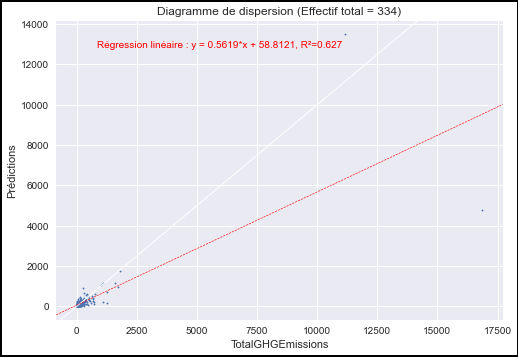

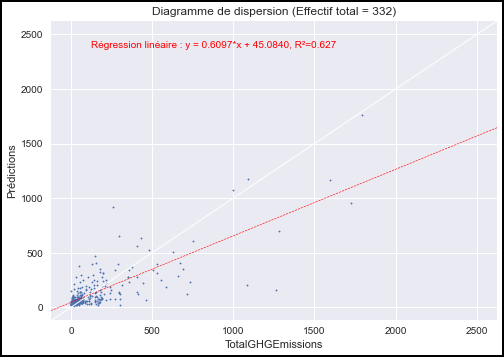

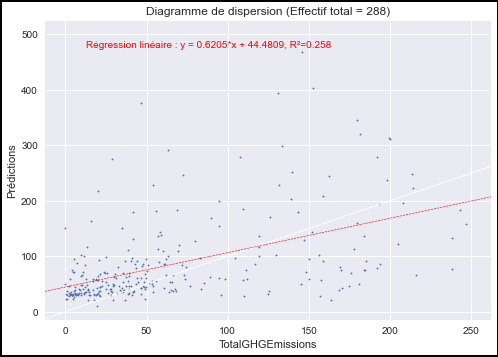

In [114]:
ser_predictions = pd.Series(np.squeeze(EU_predictions), name='Prédictions')
scatter_plot(ser_x=y_test_EU.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, ligne_diagonale=True)
scatter_plot(ser_x=y_test_EU.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, max_x=2500, max_y=2500, ligne_diagonale=True)
scatter_plot(ser_x=y_test_EU.reset_index().iloc[:,1], ser_y=ser_predictions, alpha=1, max_x=250, max_y=500, ligne_diagonale=True)

### Régularisation régression Ridge avec data normalisée par StandardScaler

##### GridSearchCV à une dimension :

In [86]:
bag_reg = BaggingRegressor(base_estimator=Ridge(alpha=0.1), max_samples=0.5, n_jobs=-1, random_state=0)
param_grid = [
    {'base_estimator__alpha': np.logspace(-5, 5, 20)}, 
    {'max_samples': [0.25, 0.5, 0.75, 1.0]}, 
    {'max_features': [4, 8, 16, 32, 63]},
    {'n_estimators': [4, 8, 16, 32, 64]}]
grid_search = GridSearchCV(bag_reg,
                           param_grid,
                           cv=10,
                           scoring='r2',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train_EU_ss, y_train_EU.iloc[:, 0])

GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=Ridge(alpha=0.1),
                                        max_samples=0.5, n_jobs=-1,
                                        random_state=0),
             n_jobs=-1,
             param_grid=[{'base_estimator__alpha': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04, 1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02, 1.62377674e-01,
       5.45559478e-01, 1.83298071e+00, 6.15848211e+00, 2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02, 2.63665090e+03, 8.85866790e+03,
       2.97635144e+04, 1.00000000e+05])},
                         {'max_samples': [0.25, 0.5, 0.75, 1.0]},
                         {'max_features': [4, 8, 16, 32, 63]},
                         {'n_estimators': [4, 8, 16, 32, 64]}],
             return_train_score=True, scoring='r2')

In [87]:
grid_search.best_params_

{'base_estimator__alpha': 20.6913808111479}

In [88]:
arrondi(grid_search.best_score_)

0.665

In [89]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

R² =    0.533 {'base_estimator__alpha': 1e-05}
R² =    0.533 {'base_estimator__alpha': 3.359818286283781e-05}
R² =    0.533 {'base_estimator__alpha': 0.00011288378916846884}
R² =    0.533 {'base_estimator__alpha': 0.000379269019073225}
R² =    0.533 {'base_estimator__alpha': 0.0012742749857031334}
R² =    0.534 {'base_estimator__alpha': 0.004281332398719391}
R² =    0.536 {'base_estimator__alpha': 0.01438449888287663}
R² =    0.543 {'base_estimator__alpha': 0.04832930238571752}
R² =    0.558 {'base_estimator__alpha': 0.1623776739188721}
R² =    0.584 {'base_estimator__alpha': 0.5455594781168515}
R² =    0.621 {'base_estimator__alpha': 1.8329807108324339}
R² =    0.657 {'base_estimator__alpha': 6.1584821106602545}
R² =    0.665 {'base_estimator__alpha': 20.6913808111479}
R² =     0.63 {'base_estimator__alpha': 69.51927961775606}
R² =    0.536 {'base_estimator__alpha': 233.57214690901213}
R² =    0.376 {'base_estimator__alpha': 784.7599703514607}
R² =    0.195 {'base_estimator__alpha': 2

##### GridSearchCV à deux dimensions :

In [90]:
param_grid = [
    {'base_estimator__alpha': np.logspace(-1, 2, 10),
    'max_samples': [0.75, 0.9, 1.0], 
    'max_features': [60, 63],
    'n_estimators': [2, 3, 4, 5, 6, 8]}]

grid_search = GridSearchCV(bag_reg, param_grid, cv=10,
                           scoring='r2', return_train_score=True, n_jobs=7)
grid_search.fit(X_train_EU_ss, y_train_EU.iloc[:,0])

GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=Ridge(alpha=0.1),
                                        max_samples=0.5, n_jobs=-1,
                                        random_state=0),
             n_jobs=7,
             param_grid=[{'base_estimator__alpha': array([  0.1       ,   0.21544347,   0.46415888,   1.        ,   2.15443469,   4.64158883,  10.        ,  21.5443469 ,  46.41588834, 100.        ]),
                          'max_features': [60, 63],
                          'max_samples': [0.75, 0.9, 1.0],
                          'n_estimators': [2, 3, 4, 5, 6, 8]}],
             return_train_score=True, scoring='r2')

In [91]:
grid_search.best_params_

{'base_estimator__alpha': 10.0,
 'max_features': 63,
 'max_samples': 1.0,
 'n_estimators': 4}

In [92]:
arrondi(grid_search.best_score_)

0.7

In [93]:
cvres = grid_search.cv_results_
resultats_zip = zip(cvres["mean_test_score"], cvres["params"])
resultats_zip = list(resultats_zip)
resultats_zip.sort(reverse=True)   # tri par score
for mean_score, params in resultats_zip:
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

R² =      0.7 {'base_estimator__alpha': 10.0, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 4}
R² =    0.699 {'base_estimator__alpha': 4.6415888336127775, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 4}
R² =    0.699 {'base_estimator__alpha': 10.0, 'max_features': 63, 'max_samples': 0.75, 'n_estimators': 4}
R² =    0.698 {'base_estimator__alpha': 4.6415888336127775, 'max_features': 63, 'max_samples': 0.75, 'n_estimators': 5}
R² =    0.698 {'base_estimator__alpha': 21.54434690031882, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 4}
R² =    0.698 {'base_estimator__alpha': 4.6415888336127775, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 5}
R² =    0.698 {'base_estimator__alpha': 2.1544346900318834, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 4}
R² =    0.698 {'base_estimator__alpha': 10.0, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 5}
R² =    0.698 {'base_estimator__alpha': 4.6415888336127775, 'max_features': 60, 'max_samp

##### Généralisation sur le test set

In [94]:
EU_predictions = grid_search.predict(X_test_EU_ss)
print("R² =", arrondi(r2_score(y_test_EU, EU_predictions)))

R² = 0.613


On passe de 0.619 (Ridge sans normalisation, sans bagging) à 0.613 (Ridge avec normalisation, avec bagging).  
Les résultats du Ridge sont excellents en comparaison des autres modèles.

### Régularisation régression Lasso avec data normalisée par StandardScaler

##### GridSearchCV à une dimension :

In [95]:
bag_reg = BaggingRegressor(base_estimator=Lasso(alpha=1), max_samples=1.0, n_jobs=-1, random_state=0)
param_grid = [
    {'base_estimator__alpha': np.logspace(-4, 2, 10)}, 
    {'max_samples': [0.25, 0.5, 0.75, 0.9, 1.0]}, 
    {'max_features': [8, 16, 32, 63]},
    {'n_estimators': [8, 16, 32, 64, 128]}]
grid_search = GridSearchCV(bag_reg,
                           param_grid,
                           cv=10,
                           scoring='r2',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train_EU_ss, y_train_EU.iloc[:, 0])

GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=Lasso(alpha=1),
                                        n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'base_estimator__alpha': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02, 4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00, 2.15443469e+01,
       1.00000000e+02])},
                         {'max_samples': [0.25, 0.5, 0.75, 0.9, 1.0]},
                         {'max_features': [8, 16, 32, 63]},
                         {'n_estimators': [8, 16, 32, 64, 128]}],
             return_train_score=True, scoring='r2')

In [96]:
grid_search.best_params_

{'n_estimators': 64}

In [97]:
arrondi(grid_search.best_score_)

0.691

In [98]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

R² =    0.271 {'base_estimator__alpha': 0.0001}
R² =    0.272 {'base_estimator__alpha': 0.00046415888336127773}
R² =    0.278 {'base_estimator__alpha': 0.002154434690031882}
R² =    0.305 {'base_estimator__alpha': 0.01}
R² =    0.418 {'base_estimator__alpha': 0.046415888336127774}
R² =     0.68 {'base_estimator__alpha': 0.21544346900318823}
R² =    0.684 {'base_estimator__alpha': 1.0}
R² =     0.64 {'base_estimator__alpha': 4.641588833612772}
R² =    0.568 {'base_estimator__alpha': 21.54434690031882}
R² =    0.362 {'base_estimator__alpha': 100.0}
R² =    0.625 {'max_samples': 0.25}
R² =    0.672 {'max_samples': 0.5}
R² =    0.679 {'max_samples': 0.75}
R² =    0.682 {'max_samples': 0.9}
R² =    0.684 {'max_samples': 1.0}
R² =    0.285 {'max_features': 8}
R² =    0.301 {'max_features': 16}
R² =    0.455 {'max_features': 32}
R² =    0.681 {'max_features': 63}
R² =    0.682 {'n_estimators': 8}
R² =    0.683 {'n_estimators': 16}
R² =    0.688 {'n_estimators': 32}
R² =    0.691 {'n_estimator

##### GridSearchCV à deux dimensions :

In [99]:
param_grid = [
    {'base_estimator__alpha': np.logspace(-1, 2, 7),
    'max_samples': [0.5, 0.75, 1.0], 
    'max_features': [56, 63],
    'n_estimators': [8, 16, 32, 64, 128]}]

grid_search = GridSearchCV(bag_reg, param_grid, cv=10,
                           scoring='r2', return_train_score=True, n_jobs=7)
grid_search.fit(X_train_EU_ss, y_train_EU.iloc[:,0])

GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=Lasso(alpha=1),
                                        n_jobs=-1, random_state=0),
             n_jobs=7,
             param_grid=[{'base_estimator__alpha': array([  0.1       ,   0.31622777,   1.        ,   3.16227766,  10.        ,  31.6227766 , 100.        ]),
                          'max_features': [56, 63],
                          'max_samples': [0.5, 0.75, 1.0],
                          'n_estimators': [8, 16, 32, 64, 128]}],
             return_train_score=True, scoring='r2')

In [100]:
grid_search.best_params_

{'base_estimator__alpha': 1.0,
 'max_features': 63,
 'max_samples': 1.0,
 'n_estimators': 64}

In [101]:
arrondi(grid_search.best_score_)

0.692

In [102]:
cvres = grid_search.cv_results_
resultats_zip = zip(cvres["mean_test_score"], cvres["params"])
resultats_zip = list(resultats_zip)
resultats_zip.sort(reverse=True)   # tri par score
for mean_score, params in resultats_zip:
    print("R² =", str(arrondi(mean_score)).rjust(8, ' '), params)

R² =    0.692 {'base_estimator__alpha': 1.0, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 64}
R² =    0.691 {'base_estimator__alpha': 1.0, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 128}
R² =    0.691 {'base_estimator__alpha': 1.0, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 32}
R² =    0.689 {'base_estimator__alpha': 1.0, 'max_features': 63, 'max_samples': 0.75, 'n_estimators': 128}
R² =    0.688 {'base_estimator__alpha': 0.31622776601683794, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 32}
R² =    0.688 {'base_estimator__alpha': 1.0, 'max_features': 63, 'max_samples': 0.75, 'n_estimators': 64}
R² =    0.687 {'base_estimator__alpha': 1.0, 'max_features': 63, 'max_samples': 1.0, 'n_estimators': 16}
R² =    0.687 {'base_estimator__alpha': 1.0, 'max_features': 63, 'max_samples': 0.5, 'n_estimators': 32}
R² =    0.687 {'base_estimator__alpha': 1.0, 'max_features': 63, 'max_samples': 0.75, 'n_estimators': 32}
R² =    0.686 {'base_estimator__al

##### Généralisation sur le test set

In [103]:
EU_predictions = grid_search.predict(X_test_EU_ss)
print("R² =", arrondi(r2_score(y_test_EU, EU_predictions)))

R² = 0.441


Pas mieux que le Ridge.